<a href="https://colab.research.google.com/github/juliagrodrigues/lia1_2024_1/blob/main/Entregas_J%C3%BAlia_Gomes/AULA_10%20-%20Ci%C3%AAncia_de_Dados%20-%20Tratamento_IIR.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Ciencia de Dados - Tratamento de oportunidades vindas do IIR**

O objetivo do seguinte código é realizar o tratamento de dados de planilhas que são extraidas do IIR, realizando o tratamento adequado para extração podendo realizar analises



In [70]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
import re

In [71]:
# Carrega o dataset
df_nova = pd.read_excel('/content/IIR/Project.xlsx')
df_velha = pd.read_excel('/content/IIR/Plataforma.xlsx')
df_canceladas = pd.read_excel('/content/IIR/Canceladas.xlsx')
df_tratadas = pd.read_excel('/content/IIR/Tratadas.xlsx')

In [72]:
# Shape
df_nova.shape

(1526, 16)

In [73]:
# Amostra dos dados
df_nova.head()

,PROJECT_ID,IND_DESC,PEC_TIMING,LOCAL_TIV,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY
0,300476405,Production (Oil & Gas),P2,354100000,RONCADOR FIELD 2024 WATER INJECTION WELLS DRIL...,Drilling Projects,Petrobras - Unidade de Operacoes do Espirito S...,Operational,NaN,NaN,NaN,NaN,202406,2024-12-30,Petrobras - Unidade de Operacoes do Espirito S...,19
1,300869808,Oil & Gas Pipelines,P1,27320000,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9
2,300865925,Production (Oil & Gas),P1,910600000,ATAPU 2 P-84 FPSO 2027 DRILLING PROGRAM I,Drilling Projects,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202701,2028-01-30,Petrobras - Unidade de Operacoes de Exploracao...,7
3,300871261,Oil & Gas Pipelines,E2,324600000,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21
4,300878602,Oil & Gas Pipelines,E2,43950000,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21


In [75]:
# Amostra dos dados
df_nova.tail()

,PROJECT_ID,IND_DESC,PEC_TIMING,LOCAL_TIV,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY
1521,300726581,Industrial Manufacturing,P1,40000000,SOORETAMA COOKING HOUSEHOLD ITEMS PLANT EXPANSION,Plant Expansion,Itatiaia Moveis SA,Operational,Sooretama,ES,Espirito Santo,NaN,202407,2025-07-31,Itatiaia Moveis SA (Owner and Operator) perfor...,4
1522,300859700,Alternative Fuel,P1,6000000,SANTO ANTONIO DA BARRA (FLORESTA) ETHANOL PLAN...,Automation,Floresta SA Acucar e Alcool,Operational,Santo Antonio Da Barra,GO,Goias,NaN,202410,2025-03-25,Floresta SA Acucar e Alcool develops Project S...,3
1523,300859703,Alternative Fuel,P1,12000000,SANTO ANTONIO DA BARRA (FLORESTA) ETHANOL PLAN...,Environmental Mandate (Product Compliance Mand...,Floresta SA Acucar e Alcool,Operational,Santo Antonio Da Barra,GO,Goias,NaN,202410,2025-03-25,Floresta SA Acucar e Alcool develops Project S...,3
1524,300608124,Industrial Manufacturing,P2,200000000,TRES LAGOAS GRASSROOT INTERMODAL CARGO TERMINA...,Grassroot,Secretaria da Infraestrutura do Estado do Mato...,Planned,Tres Lagoas,MM,Mato Grosso do Sul,NaN,202407,2025-12-31,Governo do Estado de Mato Grosso do Sul (Owner...,18
1525,300469551,Industrial Manufacturing,P1,82910000,AGUA CLARA GRASSROOT CARGO RAILWAY TERMINAL,Grassroot,"Secretaria Estadual de Meio Ambiente, Desenvol...",Planned,Agua Clara,MM,Mato Grosso do Sul,NaN,202407,2025-12-25,Ministerio dos Transportes do Brasil (Owner) w...,3


**Análise exploratória**

In [76]:
# Colunas do conjunto de dados
df_nova.columns

Index(['PROJECT_ID', 'IND_DESC', 'PEC_TIMING', 'LOCAL_TIV', 'PROJ_NAME',
       'PROJECT_TYPE', 'OWNER_NAME', 'P_STATUS_D', 'PLANT_CITY', 'PLANT_ST',
       'PL_ST_NAME', 'P_STATE_ID', 'KICKOFF', 'COMPLETION', 'SCOPE',
       'ACTIVITY'],
      dtype='object')

In [77]:
# Verificando o tipo de dado de cada coluna
df_nova.dtypes

PROJECT_ID               int64
IND_DESC                object
PEC_TIMING              object
LOCAL_TIV                int64
PROJ_NAME               object
PROJECT_TYPE            object
OWNER_NAME              object
P_STATUS_D              object
PLANT_CITY              object
PLANT_ST                object
PL_ST_NAME              object
P_STATE_ID             float64
KICKOFF                  int64
COMPLETION      datetime64[ns]
SCOPE                   object
ACTIVITY                 int64
dtype: object

In [78]:
# Resumo estatístico da coluna com o Valor de Venda
df_nova['LOCAL_TIV'].describe()

count    1.526000e+03
mean     2.154411e+08
std      9.981282e+08
min      3.000000e+06
25%      7.560000e+06
50%      1.550000e+07
75%      5.040000e+07
max      2.100000e+10
Name: LOCAL_TIV, dtype: float64

In [79]:
# Verificando se há registros duplicados
df_nova[df_nova.duplicated()]

,PROJECT_ID,IND_DESC,PEC_TIMING,LOCAL_TIV,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY


In [80]:
# Verificando de há valores ausentes
df_nova.isnull().sum()

PROJECT_ID         0
IND_DESC           0
PEC_TIMING         0
LOCAL_TIV          0
PROJ_NAME          0
PROJECT_TYPE       0
OWNER_NAME         0
P_STATUS_D         0
PLANT_CITY        40
PLANT_ST          40
PL_ST_NAME        40
P_STATE_ID      1526
KICKOFF            0
COMPLETION         0
SCOPE              0
ACTIVITY           0
dtype: int64

# **Realizando o Tratamento**
# **1. Filtramos as oportunidades canceladas;**

In [81]:
# Renomeie a coluna 'ID Projeto' da df_canceladas para 'PROJECT_ID' para facilitar a comparação
df_canceladas.rename(columns={'ID Projeto': 'PROJECT_ID'}, inplace=True)

# Use a função isin() para verificar quais valores da coluna 'PROJECT_ID' da df_nova estão presentes na df_canceladas
valores_cancelados = df_canceladas['PROJECT_ID'].tolist()
df_nova = df_nova[~df_nova['PROJECT_ID'].isin(valores_cancelados)]

# Mostrar o DataFrame com as alterações
df_nova.head()

,PROJECT_ID,IND_DESC,PEC_TIMING,LOCAL_TIV,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY
0,300476405,Production (Oil & Gas),P2,354100000,RONCADOR FIELD 2024 WATER INJECTION WELLS DRIL...,Drilling Projects,Petrobras - Unidade de Operacoes do Espirito S...,Operational,NaN,NaN,NaN,NaN,202406,2024-12-30,Petrobras - Unidade de Operacoes do Espirito S...,19
1,300869808,Oil & Gas Pipelines,P1,27320000,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9
2,300865925,Production (Oil & Gas),P1,910600000,ATAPU 2 P-84 FPSO 2027 DRILLING PROGRAM I,Drilling Projects,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202701,2028-01-30,Petrobras - Unidade de Operacoes de Exploracao...,7
3,300871261,Oil & Gas Pipelines,E2,324600000,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21
4,300878602,Oil & Gas Pipelines,E2,43950000,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21


In [82]:
# Shape
df_nova.shape

(1435, 16)

#**2. Filtramos as oportunidades da planilha de oportunidades tratadas;**

In [83]:
# Renomeie a coluna 'ID Projeto' da df_tratadas para 'PROJECT_ID' para facilitar a comparação
df_tratadas.rename(columns={'ID Projeto': 'PROJECT_ID'}, inplace=True)

# Use a função isin() para verificar quais valores da coluna 'PROJECT_ID' da df_nova estão presentes na df_tratadas
valores_tratados = df_tratadas['PROJECT_ID'].tolist()
df_nova = df_nova[~df_nova['PROJECT_ID'].isin(valores_tratados)]

# Mostrar o DataFrame com as alterações
df_nova.head()

,PROJECT_ID,IND_DESC,PEC_TIMING,LOCAL_TIV,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY
0,300476405,Production (Oil & Gas),P2,354100000,RONCADOR FIELD 2024 WATER INJECTION WELLS DRIL...,Drilling Projects,Petrobras - Unidade de Operacoes do Espirito S...,Operational,NaN,NaN,NaN,NaN,202406,2024-12-30,Petrobras - Unidade de Operacoes do Espirito S...,19
1,300869808,Oil & Gas Pipelines,P1,27320000,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9
2,300865925,Production (Oil & Gas),P1,910600000,ATAPU 2 P-84 FPSO 2027 DRILLING PROGRAM I,Drilling Projects,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202701,2028-01-30,Petrobras - Unidade de Operacoes de Exploracao...,7
3,300871261,Oil & Gas Pipelines,E2,324600000,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21
4,300878602,Oil & Gas Pipelines,E2,43950000,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21


In [84]:
# Shape
df_nova.shape

(1433, 16)

# **3. Separamos as tecnologias do nosso interesse;**

In [85]:
# Defina a lista de palavras-chave de tecnologia
tecnologias_chave = ['DCS', 'SCADA', 'PUMPS', 'PLC', 'CLP', 'INVERSOR', 'DRIVE', 'IHM', 'MCC']

# Adicione a coluna 'Tecnologia' à df_nova e preencha com base nas palavras-chave encontradas na coluna 'SCOPE'
df_nova['Tecnologia'] = df_nova['SCOPE'].apply(lambda x: ', '.join(set(word for word in tecnologias_chave if word in x.upper())))

# Remova as linhas que não contêm nenhuma das palavras-chave de tecnologia
df_nova = df_nova[df_nova['Tecnologia'] != '']

# Mostrar o DataFrame com as alterações
df_nova.head()

,PROJECT_ID,IND_DESC,PEC_TIMING,LOCAL_TIV,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY,Tecnologia
1,300869808,Oil & Gas Pipelines,P1,27320000,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9,SCADA
3,300871261,Oil & Gas Pipelines,E2,324600000,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS
4,300878602,Oil & Gas Pipelines,E2,43950000,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS
6,300847711,Oil & Gas Pipelines,P1,10120000,CARAPEBA WEST PRODUCTION PLATFORM GRASSROOT CR...,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202601,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,SCADA
7,300847686,Production (Oil & Gas),P1,505900000,CARAPEBA WEST GRASSROOT PRODUCTION PLATFORM,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202410,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,"MCC, SCADA"


In [86]:
# Shape
df_nova.shape

(1294, 17)

# **4. Filtramos usando a atividade de projeto, até a fase 24 ainda temos tempo de influenciar;**


In [87]:
# Remova as linhas onde o valor da coluna 'ACTIVITY' é maior que 24
df_nova = df_nova.loc[df_nova['ACTIVITY'] <= 24]

# Mostrar o DataFrame com as alterações
df_nova.head()

,PROJECT_ID,IND_DESC,PEC_TIMING,LOCAL_TIV,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY,Tecnologia
1,300869808,Oil & Gas Pipelines,P1,27320000,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9,SCADA
3,300871261,Oil & Gas Pipelines,E2,324600000,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS
4,300878602,Oil & Gas Pipelines,E2,43950000,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS
6,300847711,Oil & Gas Pipelines,P1,10120000,CARAPEBA WEST PRODUCTION PLATFORM GRASSROOT CR...,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202601,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,SCADA
7,300847686,Production (Oil & Gas),P1,505900000,CARAPEBA WEST GRASSROOT PRODUCTION PLATFORM,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202410,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,"MCC, SCADA"


In [88]:
# Shape
df_nova.shape

(1294, 17)

# **5. Adequamos o valor total a 3%, que o valor estimado para a parte de automação em um projeto;**

In [89]:
# Renomear a coluna LOCAL_TIV para Valor
df_nova.rename(columns={'LOCAL_TIV': 'Investimento'}, inplace=True)

# Substituir os valores na coluna Valor por 3% do valor original
df_nova['Investimento'] *= 0.03

# Converter os valores para Reais (R$) e formatar como string
df_nova['Investimento'] = 'R$ ' + df_nova['Investimento'].astype(str) + '.00'

# Mostrar o DataFrame com as alterações
df_nova.head()

,PROJECT_ID,IND_DESC,PEC_TIMING,Investimento,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY,Tecnologia
1,300869808,Oil & Gas Pipelines,P1,R$ 819600.0.00,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9,SCADA
3,300871261,Oil & Gas Pipelines,E2,R$ 9738000.0.00,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS
4,300878602,Oil & Gas Pipelines,E2,R$ 1318500.0.00,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS
6,300847711,Oil & Gas Pipelines,P1,R$ 303600.0.00,CARAPEBA WEST PRODUCTION PLATFORM GRASSROOT CR...,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202601,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,SCADA
7,300847686,Production (Oil & Gas),P1,R$ 15177000.0.00,CARAPEBA WEST GRASSROOT PRODUCTION PLATFORM,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202410,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,"MCC, SCADA"


# **6. Separar ano e mês de kickoff;**

In [90]:
# Converta a coluna 'KICKOFF' para string, se necessário
df_nova['KICKOFF'] = df_nova['KICKOFF'].astype(str)

# Extrair o ano e o mês da coluna 'Kickoff' e criar as colunas 'Ano Kickoff' e 'Mês Kickoff'
df_nova['Ano Kickoff'] = df_nova['KICKOFF'].str.extract(r'(\d{4})\d{2}$')
df_nova['Mês Kickoff'] = df_nova['KICKOFF'].str.extract(r'\d{4}(\d{2})$')

# Visualize as novas colunas
df_nova.head(2)

,PROJECT_ID,IND_DESC,PEC_TIMING,Investimento,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY,Tecnologia,Ano Kickoff,Mês Kickoff
1,300869808,Oil & Gas Pipelines,P1,R$ 819600.0.00,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9,SCADA,2026,10
3,300871261,Oil & Gas Pipelines,E2,R$ 9738000.0.00,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS,2024,03


# **7. Alteramos as siglas dos estados;**

In [91]:
# Definir um dicionário com os mapeamentos de nomes de estados para siglas
mapeamento_estados = {
    'Acre': 'AC',
    'Alagoas': 'AL',
    'Amapa': 'AP',
    'Amazonas': 'AM',
    'Bahia': 'BA',
    'Ceara': 'CE',
    'Distrito Federal': 'DF',
    'Espirito Santo': 'ES',
    'Goias': 'GO',
    'Maranhao': 'MA',
    'Mato Grosso': 'MT',
    'Mato Grosso do Sul': 'MS',
    'Minas Gerais': 'MG',
    'Para': 'PA',
    'Paraiba': 'PB',
    'Parana': 'PR',
    'Pernambuco': 'PE',
    'Piaui': 'PI',
    'Rio de Janeiro': 'RJ',
    'Rio Grande do Norte': 'RN',
    'Rio Grande do Sul': 'RS',
    'Rondonia': 'RO',
    'Roraima': 'RR',
    'Santa Catarina': 'SC',
    'Sao Paulo': 'SP',
    'Sergipe': 'SE',
    'Tocantins': 'TO'
}

# Substituir os nomes dos estados pelas siglas correspondentes na coluna PLANT_ST
df_nova['PLANT_ST'] = df_nova['PL_ST_NAME'].map(mapeamento_estados)

# Mostrar o DataFrame com as alterações
df_nova.head(20)

,PROJECT_ID,IND_DESC,PEC_TIMING,Investimento,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY,Tecnologia,Ano Kickoff,Mês Kickoff
1,300869808,Oil & Gas Pipelines,P1,R$ 819600.0.00,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9,SCADA,2026,10
3,300871261,Oil & Gas Pipelines,E2,R$ 9738000.0.00,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS,2024,03
4,300878602,Oil & Gas Pipelines,E2,R$ 1318500.0.00,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS,2024,03
6,300847711,Oil & Gas Pipelines,P1,R$ 303600.0.00,CARAPEBA WEST PRODUCTION PLATFORM GRASSROOT CR...,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202601,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,SCADA,2026,01
7,300847686,Production (Oil & Gas),P1,R$ 15177000.0.00,CARAPEBA WEST GRASSROOT PRODUCTION PLATFORM,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202410,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,"MCC, SCADA",2024,10
9,300763449,Chemical Processing (CPI),P1,R$ 604800.0.00,RIO VERDE FERTILIZERS GRASSROOT PLANT,Grassroot,Nutrien Solucoes Agricolas,Planned,Rio Verde,GO,Goias,NaN,202404,2025-03-25,Nutrien performs Project Justification for Fer...,16,"PUMPS, DCS, PLC",2024,04
10,300373926,Chemical Processing (CPI),P1,R$ 756000.0.00,TRES LAGOAS CHLORINE DIOXIDE PLANT EXPANSION P...,Plant Expansion,Nouryon Brasil SA,Operational,Tres Lagoas,MS,Mato Grosso do Sul,NaN,202404,2024-06-25,Akzo Nobel Brasil performs Detailed Design for...,9,"PUMPS, DCS",2024,04
11,300877741,Chemical Processing (CPI),P1,R$ 151200.0.00,MAUA RESINS PLANT MIXER REPLACEMENTS,Replacement,Akzo Nobel Limitada,Operational,Maua,SP,Sao Paulo,NaN,202408,2024-09-13,Akzo Nobel performs Project Scope for Acrylic ...,3,"PUMPS, DCS",2024,08
12,300872444,Chemical Processing (CPI),P1,R$ 151200.0.00,GUARULHOS RESINS PLANT MIXER REPLACEMENTS,Upgrade,Axalta Coating Systems Brazil Ltda,Operational,Guarulhos,SP,Sao Paulo,NaN,202412,2025-03-28,Axalta Coating Systems performs Project Scope ...,3,"PUMPS, DCS",2024,12
13,300810543,Chemical Processing (CPI),P1,R$ 3780000.0.00,SAO PAULO FERTILIZERS GRASSROOT PLANT,Grassroot,Haifa Group South America,Planned,Sao Paulo,SP,Sao Paulo,NaN,202503,2026-02-27,Haifa Group South America performs Preliminary...,7,"PUMPS, DCS, PLC",2025,03


# **8. Criamos a coluna regional e alteramos as oportunidades por regionais;**

In [92]:
# Adicionar coluna 'Regional' com valores vazios
df_nova['Regional'] = ''

# Criar função para preencher a coluna Regional de acordo com as condições
def preencher_regional(row):
    plant_st = row['PLANT_ST']
    plant_city = row['PLANT_CITY']

    if plant_st in ['MT', 'TO', 'MS', 'GO', 'DF', 'AC', 'RO']:
        return 'Centro Oeste'
    elif plant_st == 'MG' and plant_city in ['Uberlandia', 'Uberaba', 'Patos de Minas', 'Araguari', 'Ituiutaba',
                                             'Frutal', 'Iturama', 'Monte Alegre de Minas', 'Prata', 'Campina Verde',
                                             'Santa Vitoria', 'Tupaciguara', 'Nova Ponte', 'Delta']:
        return 'Centro Oeste'
    elif plant_st == 'MG':
        return 'BH/RIO'
    elif plant_st in ['RJ', 'ES']:
        return 'BH/RIO'
    elif plant_st in ['AM', 'PA', 'MA', 'PI', 'CE', 'RN', 'PB', 'PE', 'AL', 'SE', 'AP', 'RR']:
        return 'Norte/Nordeste'
    elif plant_st == 'BA' and plant_city in ['Barreiras', 'Luis Eduardo Magalhaes', 'Formosa do Rio Preto',
                                             'Santa Maria da Vitoria', 'São Desiderio', 'Correntina', 'Wanderley',
                                             'Riachao das Neves', 'Bom Jesus da Lapa']:
        return 'Centro Oeste'
    elif plant_st == 'BA':
        return 'Norte/Nordeste'
    elif plant_st == 'SP' and plant_city in ['Alfenas', 'Camanducaia', 'Cambui', 'Pouso Alegre', 'Pocos De Caldas',
                        'Caxambu', 'Santa Rita Do Sapucai', 'Tres Coracoes', 'Ouro Fino',
                        'Varginha', 'Sumare', 'Itapetininga', 'Ribeirao Preto',
                        'Guarulhos', 'Cotia', 'Guaratingueta', 'Jundiai', 'Paulinia', 'Suzano',
                        'Maua', 'Sao Jose Dos Campos', 'Mogi Mirim', 'Santo Andre', 'Mogi Das Cruzes',
                        'Mogi Guacu', 'Sao Roque', 'Itupeva', 'Campinas', 'Pindamonhangaba',
                        'Sao Bernardo Do Campo', 'Indaiatuba', 'Santo Antonio De Posse', 'Jacareí',
                        'S. Caetano Sul', 'São Bernardo Do Campo', 'S B Campo', 'Jacarei', 'Caieiras',
                        'Valinhos', 'Sertaozinho', 'Morro Agudo', 'Jardinopolis', 'Leme', 'Santos',
                        'Cubatao', 'Itapecerica Da Serra', 'Lencois Paulista', 'Ourinhos', 'Mairinque',
                        'Bebedouro', 'Cosmopolis', 'Porto Ferreira', 'Sao José Do Rio Pardo', 'Tatui',
                        'Uchoa', 'Guarujá', 'Itapira', 'Sao Jose Do Rio Pardo', 'Cacapava', 'Potirendaba',
                        'Santana Do Parnaiba', 'Matao', 'Boa Esperanca Do Sul', 'Paraguacu Paulista',
                        'Narandiba', 'Catanduva', 'Brotas', 'Angatuba', 'Cabreuva', 'Jau', 'Limeira',
                        'Franco Da Rocha', 'Cravinhos', 'Guaruja', 'Hortolandia', 'Barueri', 'Cerquilho',
                        'Agudos', 'Sao Carlos', 'Itapevi', 'Americana', 'Votorantim', 'Diadema',
                        'Cajamar', 'Piracicaba', 'Mococa', 'Ipua', 'Araras', 'Presidente Epitacio',
                        'Andradina', 'Lins', 'Sorocaba', 'Porto Feliz', 'Bauru', 'Promissao', 'Orindiuva',
                        'Itatiba', 'Santa Cruz Das Palmeiras', 'Itai', 'Cajati', 'Taboao Da Serra',
                        'Nova Campina', 'Tremembe', 'Sao Sebastiao', 'Guararema', 'Sao Caetano Do Sul',
                        'Sud Mennucci', 'Pitangueiras', 'Amparo', 'Salto', 'Araraquara', 'Valparaiso',
                        'Aracatuba', 'Barra Bonita', 'Guariba', 'Ipaussu', 'Elias Fausto', 'Rafard',
                        'Rio Das Pedras', 'Ibate', 'Igarapava', 'Capivari', 'Mirandopolis', 'Dois Corregos',
                        'Taruma', 'Maracai', 'Jandira', 'Pradopolis', 'Iracemapolis', 'Americo Brasiliense',
                        'Nuporanga', 'Colina', 'Itapolis', 'Conchal', 'Ribeirao Bonito', 'Embu',
                        'Mogi-Guacu', 'Luis Antonio', 'Jaguariuna', 'Severinia', 'Olimpia', 'Tanabi',
                        'Guaira', 'Sandovalina', 'Sao Joaquim Da Barra', 'Presidente Prudente',
                        'Pontes Gestal', 'Descalvado', 'Ouroeste', 'Jaboticabal',
                        'Pereira Barreto', 'Nova Europa', 'Novo Horizonte', 'Guaraci', 'Junqueiropolis',
                        'Rio Claro', 'Vinhedo', 'Bento de Abreu', 'Brasilia', 'Extrema', 'Itajuba', 'Lavras',
                        'Machado', 'Poços De Caldas']:
        return 'Campinas'
    elif plant_st == 'SP':
        return 'Sao Paulo'
    elif plant_st == 'PR':
        return 'Curitiba'
    elif plant_st == 'SC':
        return 'Joinville'
    elif plant_st == 'RS':
        return 'Porto Alegre'
    else:
        return ''

# Aplicar a função à coluna 'Regional' da df_nova
df_nova['Regional'] = df_nova.apply(preencher_regional, axis=1)

# Visualizar a df_nova após a adição da coluna Regional
df_nova.head(20)

,PROJECT_ID,IND_DESC,PEC_TIMING,Investimento,PROJ_NAME,PROJECT_TYPE,OWNER_NAME,P_STATUS_D,PLANT_CITY,PLANT_ST,PL_ST_NAME,P_STATE_ID,KICKOFF,COMPLETION,SCOPE,ACTIVITY,Tecnologia,Ano Kickoff,Mês Kickoff,Regional
1,300869808,Oil & Gas Pipelines,P1,R$ 819600.0.00,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9,SCADA,2026,10,
3,300871261,Oil & Gas Pipelines,E2,R$ 9738000.0.00,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS,2024,03,
4,300878602,Oil & Gas Pipelines,E2,R$ 1318500.0.00,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS,2024,03,
6,300847711,Oil & Gas Pipelines,P1,R$ 303600.0.00,CARAPEBA WEST PRODUCTION PLATFORM GRASSROOT CR...,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202601,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,SCADA,2026,01,
7,300847686,Production (Oil & Gas),P1,R$ 15177000.0.00,CARAPEBA WEST GRASSROOT PRODUCTION PLATFORM,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202410,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,"MCC, SCADA",2024,10,
9,300763449,Chemical Processing (CPI),P1,R$ 604800.0.00,RIO VERDE FERTILIZERS GRASSROOT PLANT,Grassroot,Nutrien Solucoes Agricolas,Planned,Rio Verde,GO,Goias,NaN,202404,2025-03-25,Nutrien performs Project Justification for Fer...,16,"PUMPS, DCS, PLC",2024,04,Centro Oeste
10,300373926,Chemical Processing (CPI),P1,R$ 756000.0.00,TRES LAGOAS CHLORINE DIOXIDE PLANT EXPANSION P...,Plant Expansion,Nouryon Brasil SA,Operational,Tres Lagoas,MS,Mato Grosso do Sul,NaN,202404,2024-06-25,Akzo Nobel Brasil performs Detailed Design for...,9,"PUMPS, DCS",2024,04,Centro Oeste
11,300877741,Chemical Processing (CPI),P1,R$ 151200.0.00,MAUA RESINS PLANT MIXER REPLACEMENTS,Replacement,Akzo Nobel Limitada,Operational,Maua,SP,Sao Paulo,NaN,202408,2024-09-13,Akzo Nobel performs Project Scope for Acrylic ...,3,"PUMPS, DCS",2024,08,Campinas
12,300872444,Chemical Processing (CPI),P1,R$ 151200.0.00,GUARULHOS RESINS PLANT MIXER REPLACEMENTS,Upgrade,Axalta Coating Systems Brazil Ltda,Operational,Guarulhos,SP,Sao Paulo,NaN,202412,2025-03-28,Axalta Coating Systems performs Project Scope ...,3,"PUMPS, DCS",2024,12,Campinas
13,300810543,Chemical Processing (CPI),P1,R$ 3780000.0.00,SAO PAULO FERTILIZERS GRASSROOT PLANT,Grassroot,Haifa Group South America,Planned,Sao Paulo,SP,Sao Paulo,NaN,202503,2026-02-27,Haifa Group South America performs Preliminary...,7,"PUMPS, DCS, PLC",2025,03,Sao Paulo


# **9 Renomear as colunas com os nomes adequados;**

In [93]:
# Renomear as colunas da planilha df_nova
df_nova.rename(columns={
    'PROJECT_ID': 'ID Projeto',
    'IND_DESC': 'Segmento',
    'PEC_TIMING': 'Fase',
    'PROJ_NAME': 'Nome do Projeto',
    'PROJECT_TYPE': 'Tipo de projeto',
    'OWNER_NAME': 'Cliente Final',
    'P_STATUS_D': 'Status',
    'PLANT_CITY': 'Cidade',
    'PLANT_ST': 'Estado',
    'COMPLETION': 'YEAR COMPLETATION',
    'SCOPE': 'Escopo',
    'ACTIVITY': 'ATIVIDADE DO PROJETO'
}, inplace=True)

# Visualize as colunas renomeadas
df_nova.head()

,ID Projeto,Segmento,Fase,Investimento,Nome do Projeto,Tipo de projeto,Cliente Final,Status,Cidade,Estado,PL_ST_NAME,P_STATE_ID,KICKOFF,YEAR COMPLETATION,Escopo,ATIVIDADE DO PROJETO,Tecnologia,Ano Kickoff,Mês Kickoff,Regional
1,300869808,Oil & Gas Pipelines,P1,R$ 819600.0.00,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,NaN,NaN,202610,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9,SCADA,2026,10,
3,300871261,Oil & Gas Pipelines,E2,R$ 9738000.0.00,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS,2024,03,
4,300878602,Oil & Gas Pipelines,E2,R$ 1318500.0.00,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,NaN,NaN,202403,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS,2024,03,
6,300847711,Oil & Gas Pipelines,P1,R$ 303600.0.00,CARAPEBA WEST PRODUCTION PLATFORM GRASSROOT CR...,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202601,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,SCADA,2026,01,
7,300847686,Production (Oil & Gas),P1,R$ 15177000.0.00,CARAPEBA WEST GRASSROOT PRODUCTION PLATFORM,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,NaN,NaN,202410,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,"MCC, SCADA",2024,10,


# **10. Remover colunas que não estão sendo usadas;**

In [94]:
# Remover as colunas 'KICKOFF', 'PL_ST_NAME' e 'P_STATE_ID' da df_nova
df_nova = df_nova.drop(columns=['KICKOFF', 'PL_ST_NAME', 'P_STATE_ID'])

# Visualize a df_nova após a remoção das colunas
df_nova.head(4)

,ID Projeto,Segmento,Fase,Investimento,Nome do Projeto,Tipo de projeto,Cliente Final,Status,Cidade,Estado,YEAR COMPLETATION,Escopo,ATIVIDADE DO PROJETO,Tecnologia,Ano Kickoff,Mês Kickoff,Regional
1,300869808,Oil & Gas Pipelines,P1,R$ 819600.0.00,SEPIA 2 P-85 FPSO TO ROTA 3 GRASSROOT NATURAL ...,Grassroot,Petrobras - Unidade de Operacoes de Exploracao...,Planned,NaN,NaN,2028-03-30,Petrobras - Unidade de Operacoes de Exploracao...,9,SCADA,2026,10,
3,300871261,Oil & Gas Pipelines,E2,R$ 9738000.0.00,RONCADOR FIELD TO PNA-01 NATURAL GAS PIPELINE ...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS,2024,03,
4,300878602,Oil & Gas Pipelines,E2,R$ 1318500.0.00,BARRACUDA FIELD TO PNA-01 NATURAL GAS PIPELINE...,Replacement,Petrobras - Unidade de Operacoes da Bacia de C...,Operational,NaN,NaN,2024-10-30,Petrobras - Unidade de Operacoes da Bacia de C...,21,PUMPS,2024,03,
6,300847711,Oil & Gas Pipelines,P1,R$ 303600.0.00,CARAPEBA WEST PRODUCTION PLATFORM GRASSROOT CR...,Grassroot,Perenco Petroleo e Gas do Brasil,Planned,NaN,NaN,2026-11-30,Perenco Petroleo e Gas do Brasil performs Deta...,9,SCADA,2026,01,


# **11. Compare os ID's dos projetos da planilha e retire os ID's repetidos da planilha antiga;**



In [95]:
# Mesclar os DataFrames com base no ID Projeto para identificar os IDs de projeto em comum
df_merge = pd.merge(df_velha, df_nova, on='ID Projeto', how='inner')

# Identificar as linhas da df_velha que não têm IDs de projeto em comum com df_nova
df_velha = df_velha[~df_velha['ID Projeto'].isin(df_merge['ID Projeto'])]

# Visualizar df_velha após a remoção das linhas
print(df_velha)

      ID Projeto                                      Cliente Final  \
5      300812397                     Acucareira Zillo Lorenzetti SA   
6      300812413                     Acucareira Zillo Lorenzetti SA   
7      300812421                     Acucareira Zillo Lorenzetti SA   
8      300812409                     Acucareira Zillo Lorenzetti SA   
9      300600721                                 ADM do Brasil Ltda   
...          ...                                                ...   
8211   300854520  Arrozeira Pelotas Industria e Comercio de Cere...   
8212   300863804                                        Carbonor SA   
8213   300863360                          Fertilizantes Heringer SA   
8214   300507110                                          Suzano SA   
8215   300859577                             Petroleo Brasileiro SA   

                                        Nome do Projeto  \
5     MACATUBA (SAO JOSE E BIORIGIN) SUGAR PLANT RAW...   
6     MACATUBA (SAO JOSE E BI

In [96]:
df_velha.head()

,ID Projeto,Cliente Final,Nome do Projeto,Segmento,Investimento,Escopo,Tecnologia,Tipo de projeto,Status,Fase,...,País,Regional,Vendedor responsável pelo atendimento,Responsável pelo contato,Data da conversa/Observações,Nota sobre o tema,Oportunidade no ss,Atividade de projeto Atual,ATIVIDADE DO PROJETO,YEAR COMPLETATION
5,300812397,Acucareira Zillo Lorenzetti SA,MACATUBA (SAO JOSE E BIORIGIN) SUGAR PLANT RAW...,Food & Beverage,900000,Acucareira Zillo Lorenzetti SA develops Projec...,PUMPs,NaN,Operational,P1,...,Brasil,NaN,Não Atendido,NOVO,NaN,NaN,ACUCAREIRA ZILLO LORENZETTI SA. MACATUBA,3.0,3.0,2026-04-14 00:00:00
6,300812413,Acucareira Zillo Lorenzetti SA,MACATUBA (SAO JOSE E BIORIGIN) SUGAR PLANT ETH...,Food & Beverage,750000,Acucareira Zillo Lorenzetti SA develops Projec...,PUMPs,NaN,Operational,P1,...,Brasil,NaN,Não Atendido,NOVO,NaN,NaN,ACUCAREIRA ZILLO LORENZETTI SA. MACATUBA,3.0,3.0,2026-04-17 00:00:00
7,300812421,Acucareira Zillo Lorenzetti SA,MACATUBA (SAO JOSE E BIORIGIN) SUGAR PLANT SUG...,Food & Beverage,540000,Acucareira Zillo Lorenzetti SA develops Projec...,PUMPs,NaN,Operational,P1,...,Brasil,NaN,Não Atendido,NOVO,NaN,NaN,ACUCAREIRA ZILLO LORENZETTI SA. MACATUBA,3.0,3.0,2026-04-21 00:00:00
8,300812409,Acucareira Zillo Lorenzetti SA,MACATUBA (SAO JOSE E BIORIGIN) SUGAR PLANT STO...,Food & Beverage,390000,Acucareira Zillo Lorenzetti SA develops Projec...,PUMPs,NaN,Operational,P1,...,Brasil,NaN,Não Atendido,NOVO,NaN,NaN,ACUCAREIRA ZILLO LORENZETTI SA. MACATUBA,3.0,3.0,2026-04-27 00:00:00
9,300600721,ADM do Brasil Ltda,RONDONOPOLIS BIODIESEL PLANT 7MW BIOMASS-FIRED...,Alternative Fuel,1200000,"ADM do Brasil Ltda, a Subsidiary of Archer Dan...",DCS PUMP,Unit Addition,Operational,P1,...,Brasil,Centro-Oeste,Gabriel Mendes dos Santos,NaN,NaN,NaN,ADM DO BRASIL LTDA. RONDONOPOLIS,12.0,12.0,2030-02-28 00:00:00


In [97]:
# Shape
df_velha.shape

(6867, 24)

# **12. Adicionamos na planilha as linhas novas;**

In [98]:
# Verificar se todas as colunas da df_nova estão presentes na df_velha e ajustar conforme necessário
for coluna in df_nova.columns:
    if coluna not in df_velha.columns:
        df_velha[coluna] = pd.NA

# Adicionar apenas as linhas onde a coluna 'ID Projeto' da df_nova for diferente da df_velha
df_nova_diferente = df_nova[~df_nova['ID Projeto'].isin(df_velha['ID Projeto'])]
df_velha = pd.concat([df_velha, df_nova_diferente], ignore_index=True)

# Visualize a df_velha após a adição das linhas
df_velha.head(7800)

,ID Projeto,Cliente Final,Nome do Projeto,Segmento,Investimento,Escopo,Tecnologia,Tipo de projeto,Status,Fase,...,Vendedor responsável pelo atendimento,Responsável pelo contato,Data da conversa/Observações,Nota sobre o tema,Oportunidade no ss,Atividade de projeto Atual,ATIVIDADE DO PROJETO,YEAR COMPLETATION,Escopo,Regional
0,300812397,Acucareira Zillo Lorenzetti SA,MACATUBA (SAO JOSE E BIORIGIN) SUGAR PLANT RAW...,Food & Beverage,900000,Acucareira Zillo Lorenzetti SA develops Projec...,PUMPs,NaN,Operational,P1,...,Não Atendido,NOVO,NaN,NaN,ACUCAREIRA ZILLO LORENZETTI SA. MACATUBA,3.0,3.0,2026-04-14 00:00:00,NaN,NaN
1,300812413,Acucareira Zillo Lorenzetti SA,MACATUBA (SAO JOSE E BIORIGIN) SUGAR PLANT ETH...,Food & Beverage,750000,Acucareira Zillo Lorenzetti SA develops Projec...,PUMPs,NaN,Operational,P1,...,Não Atendido,NOVO,NaN,NaN,ACUCAREIRA ZILLO LORENZETTI SA. MACATUBA,3.0,3.0,2026-04-17 00:00:00,NaN,NaN
2,300812421,Acucareira Zillo Lorenzetti SA,MACATUBA (SAO JOSE E BIORIGIN) SUGAR PLANT SUG...,Food & Beverage,540000,Acucareira Zillo Lorenzetti SA develops Projec...,PUMPs,NaN,Operational,P1,...,Não Atendido,NOVO,NaN,NaN,ACUCAREIRA ZILLO LORENZETTI SA. MACATUBA,3.0,3.0,2026-04-21 00:00:00,NaN,NaN
3,300812409,Acucareira Zillo Lorenzetti SA,MACATUBA (SAO JOSE E BIORIGIN) SUGAR PLANT STO...,Food & Beverage,390000,Acucareira Zillo Lorenzetti SA develops Projec...,PUMPs,NaN,Operational,P1,...,Não Atendido,NOVO,NaN,NaN,ACUCAREIRA ZILLO LORENZETTI SA. MACATUBA,3.0,3.0,2026-04-27 00:00:00,NaN,NaN
4,300600721,ADM do Brasil Ltda,RONDONOPOLIS BIODIESEL PLANT 7MW BIOMASS-FIRED...,Alternative Fuel,1200000,"ADM do Brasil Ltda, a Subsidiary of Archer Dan...",DCS PUMP,Unit Addition,Operational,P1,...,Gabriel Mendes dos Santos,NaN,NaN,NaN,ADM DO BRASIL LTDA. RONDONOPOLIS,12.0,12.0,2030-02-28 00:00:00,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7795,300908833,CNH Industrial Latin America LTDA,CONTAGEM CONSTRUCTION MACHINERY MANUFACTURING ...,Industrial Manufacturing,R$ 1512000.0.00,NaN,"MCC, PLC, DRIVE",Modernization,Operational,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,22.0,2024-09-30 00:00:00,CNH Case New Holland Construction (Owner and O...,BH/RIO
7796,300677781,Centrais Eletricas do Norte do Brasil SA,MARANHAO 500/230/69KV IMPERATRIZ SUBSTATION UP...,Power,R$ 113400.0.00,NaN,"MCC, DCS, SCADA",Electricity Transmission,Operational,E2,...,NaN,NaN,NaN,NaN,NaN,NaN,21.0,2024-11-07 00:00:00,Eletronorte and Marte Engenharia (Engineering)...,Norte/Nordeste
7797,300610324,Fortaleza de Santa Teresinha Agricultura e Agr...,SAO JOAO DA PONTE (SANTA TERESINHA) ANIMAL FAR...,Food & Beverage,R$ 1800000.0.00,NaN,"PUMPS, PLC",Plant Expansion,Operational,P1,...,NaN,NaN,NaN,NaN,NaN,NaN,4.0,2025-04-25 00:00:00,Fortaleza de Santa Teresinha Agricultura e Agr...,BH/RIO
7798,300610355,Fortaleza de Santa Teresinha Agricultura e Agr...,SAO JOAO DA PONTE ANIMAL FARMS 2MW BIOGAS POWE...,Food & Beverage,R$ 600000.0.00,NaN,"PUMPS, MCC, DCS, SCADA",Unit Addition,Operational,P1,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,2025-04-25 00:00:00,Fortaleza de Santa Teresinha Agricultura e Agr...,BH/RIO


# **13. Organizando ordem das colunas;**


In [99]:
# Definir a ordem das colunas desejada
ordem_colunas = ['ID Projeto', 'Cliente Final', 'Nome do Projeto', 'Segmento', 'Investimento', 'Escopo',
                 'Tecnologia', 'Tipo de projeto', 'Status', 'Fase', 'Ano Kickoff', 'Mês Kickoff', 'Cidade',
                 'Estado', 'País', 'Regional', 'Vendedor responsável pelo atendimento', 'Responsável pelo contato',
                 'Data da conversa/Observações', 'Nota sobre o tema', 'Oportunidade no ss', 'Atividade de projeto Atual',
                 'ATIVIDADE DO PROJETO', 'YEAR COMPLETATION']

# Reordenar as colunas da df_nova de acordo com a ordem desejada e adicionar as colunas que não existem
df_velha = df_velha.reindex(columns=ordem_colunas, fill_value='')

# Visualizar a df_nova após a reordenação e adição de colunas
df_velha.tail(2)

,ID Projeto,Cliente Final,Nome do Projeto,Segmento,Investimento,Escopo,Tecnologia,Tipo de projeto,Status,Fase,...,País,Regional,Vendedor responsável pelo atendimento,Responsável pelo contato,Data da conversa/Observações,Nota sobre o tema,Oportunidade no ss,Atividade de projeto Atual,ATIVIDADE DO PROJETO,YEAR COMPLETATION
8159,300608124,Secretaria da Infraestrutura do Estado do Mato...,TRES LAGOAS GRASSROOT INTERMODAL CARGO TERMINA...,Industrial Manufacturing,R$ 6000000.0.00,Governo do Estado de Mato Grosso do Sul (Owner...,"MCC, PLC",Grassroot,Planned,P2,...,NaN,Centro Oeste,NaN,NaN,NaN,NaN,NaN,NaN,18.0,2025-12-31 00:00:00
8160,300469551,"Secretaria Estadual de Meio Ambiente, Desenvol...",AGUA CLARA GRASSROOT CARGO RAILWAY TERMINAL,Industrial Manufacturing,R$ 2487300.0.00,Ministerio dos Transportes do Brasil (Owner) w...,"MCC, PLC",Grassroot,Planned,P1,...,NaN,Centro Oeste,NaN,NaN,NaN,NaN,NaN,NaN,3.0,2025-12-25 00:00:00


In [100]:
# Shape
df_velha.shape

(8161, 24)

# **14. PLANILHA PRONTA SÓ EXPORTAR**

In [101]:
# Exportar a planilha para um arquivo Excel
caminho_arquivo = 'Plataforma_Atualizada.xlsx'  # Especifique o caminho e o nome do arquivo
df_velha.to_excel(caminho_arquivo, index=False)  # index=False para não incluir o índice na exportação

print(f'A planilha foi exportada para: {caminho_arquivo}')

A planilha foi exportada para: Plataforma_Atualizada.xlsx


#**Algumas análises e desafios para separação e visualização dos dados**

##Desafio 1 - Top 10 clientes finais com mais volume de projeto
Analise os clientes finais que mais se repetem

In [102]:
# Contagem de ocorrências de cada cliente final
contagem_clientes = df_velha['Cliente Final'].value_counts()

# Selecionar os 10 clientes mais frequentes
top_10_clientes = contagem_clientes.head(10)

print("Top 10 Clientes mais Repetidos:")
print(top_10_clientes)

Top 10 Clientes mais Repetidos:
Cliente Final
Empresa de Pesquisa Energetica            76
Casa dos Ventos Energias Renovaveis SA    74
Petroleo Brasileiro SA                    69
Agencia Nacional de Energia Eletrical     61
3R Petroleum Oleo e Gas SA                59
JBS SA                                    57
Millenium BioEnergia SA                   53
Vale SA                                   52
Raizen Energia SA                         46
ENEVA SA                                  37
Name: count, dtype: int64


## Desafio 2 - Segmentação geográfica
Analise do investimento por região geográfica (estado).

object


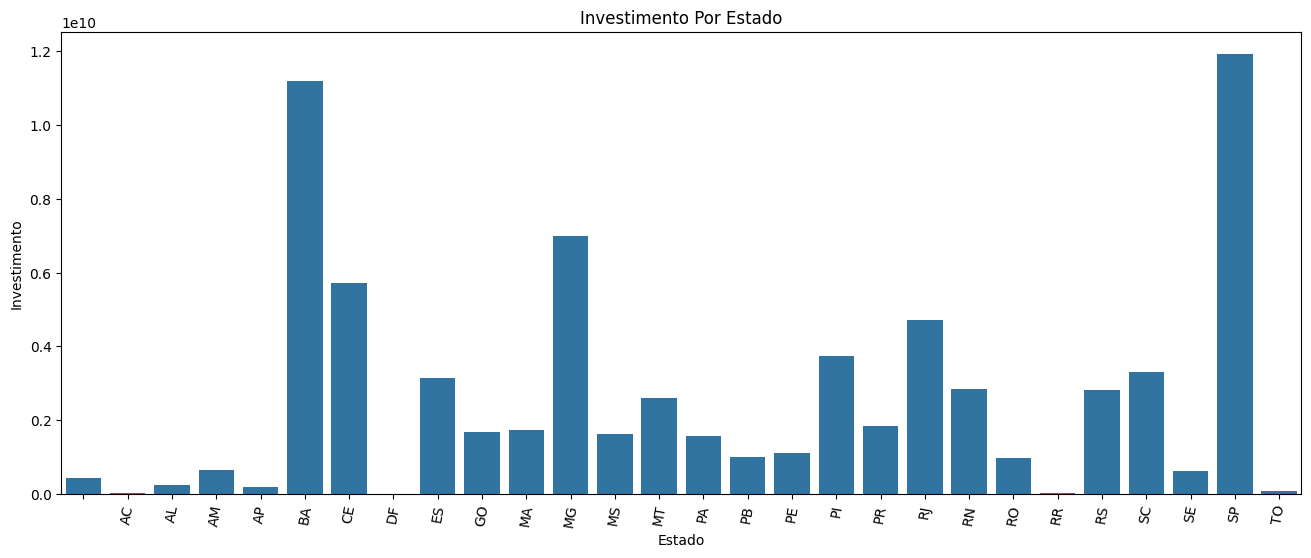

In [103]:
# Verificar os tipos de dados na coluna 'Investimento'
print(df_velha['Investimento'].dtype)

# Converter a coluna 'Investimento' para números, substituindo valores não numéricos por NaN
df_velha['Investimento'] = pd.to_numeric(df_velha['Investimento'], errors='coerce')

# Remover ou substituir NaNs, dependendo da sua estratégia
# Por exemplo, você pode substituir NaNs por 0:
df_velha['Investimento'].fillna(0, inplace=True)

# Agrupar por estado e calcular o total de investimento
df_velha_p3 = df_velha.groupby('Estado')['Investimento'].sum().reset_index()

# Plot
plt.figure(figsize=(16, 6))
sns.barplot(data=df_velha_p3, y='Investimento', x='Estado').set(title='Investimento Por Estado')
plt.xticks(rotation=80)
plt.show()

##Desafio 3 - Média de investimentos por estado
Analise por box-plot dos investimentos por estado

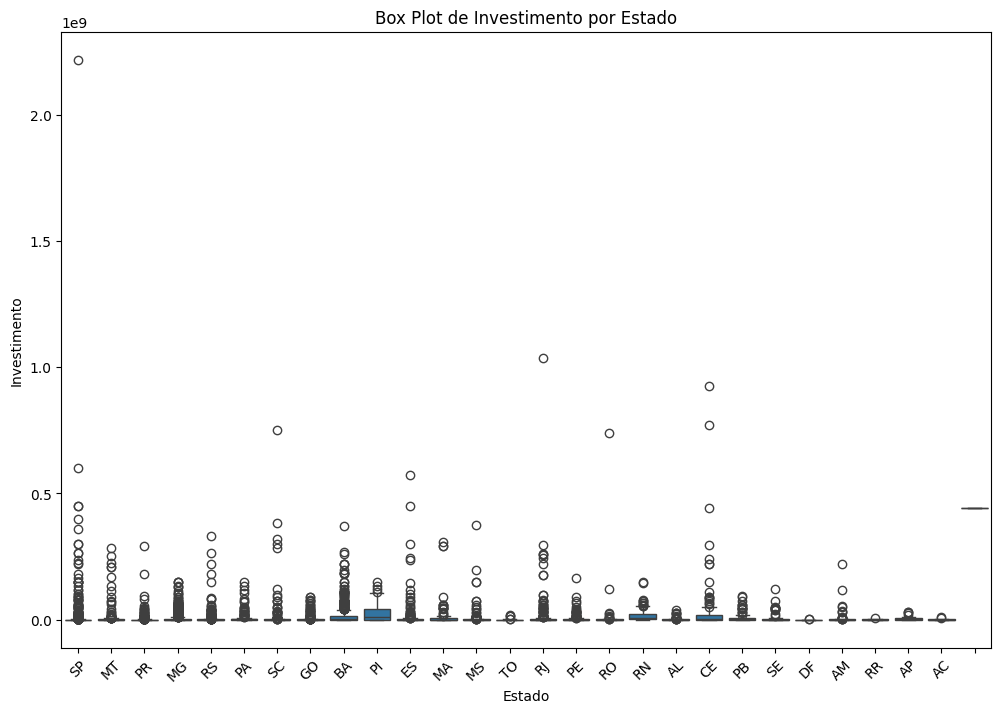

In [104]:
# Filtrar apenas as linhas em que o estado está preenchido
df_filtrada = df_velha[df_velha['Estado'].notnull()]

# Plotar o box plot do investimento por estado
plt.figure(figsize=(12, 8))
sns.boxplot(data=df_filtrada, x='Estado', y='Investimento')
plt.title('Box Plot de Investimento por Estado')
plt.xlabel('Estado')
plt.ylabel('Investimento')
plt.xticks(rotation=45)
plt.show()

## Desafio 4 - Tecnologia por estado
Analise as tecnologias mais empregadas por estado

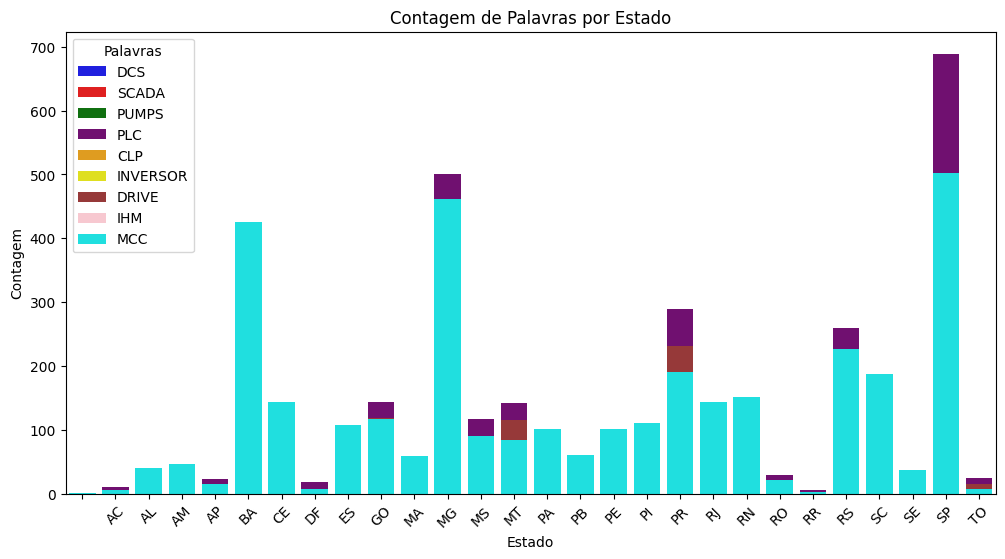

In [107]:
# Lista das palavras que queremos contar
palavras = ['DCS', 'SCADA', 'PUMPS', 'PLC', 'CLP', 'INVERSOR', 'DRIVE', 'IHM', 'MCC']

# Função para contar a quantidade de vezes que cada palavra aparece na coluna 'Tecnologia'
def contar_palavras(texto):
    if isinstance(texto, str):
        contador = {palavra: texto.count(palavra) for palavra in palavras}
        return pd.Series(contador)
    else:
        return pd.Series({palavra: 0 for palavra in palavras})

# Aplicar a função para contar as palavras na coluna 'Tecnologia'
contagem_palavras = df_velha['Tecnologia'].apply(contar_palavras)

# Somar a contagem de cada palavra por estado
contagem_palavras_estado = pd.concat([df_velha['Estado'], contagem_palavras], axis=1).groupby('Estado').sum().reset_index()

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=contagem_palavras_estado, x='Estado', y='DCS', color='blue', label='DCS')
sns.barplot(data=contagem_palavras_estado, x='Estado', y='SCADA', color='red', label='SCADA')
sns.barplot(data=contagem_palavras_estado, x='Estado', y='PUMPS', color='green', label='PUMPS')
sns.barplot(data=contagem_palavras_estado, x='Estado', y='PLC', color='purple', label='PLC')
sns.barplot(data=contagem_palavras_estado, x='Estado', y='CLP', color='orange', label='CLP')
sns.barplot(data=contagem_palavras_estado, x='Estado', y='INVERSOR', color='yellow', label='INVERSOR')
sns.barplot(data=contagem_palavras_estado, x='Estado', y='DRIVE', color='brown', label='DRIVE')
sns.barplot(data=contagem_palavras_estado, x='Estado', y='IHM', color='pink', label='IHM')
sns.barplot(data=contagem_palavras_estado, x='Estado', y='MCC', color='cyan', label='MCC')

plt.title('Contagem de Palavras por Estado')
plt.xlabel('Estado')
plt.ylabel('Contagem')
plt.legend(title='Palavras')
plt.xticks(rotation=45)
plt.show()


##Desafio 5 - Volume de projetos por estado
Estados que apresentam maior numero de projetos

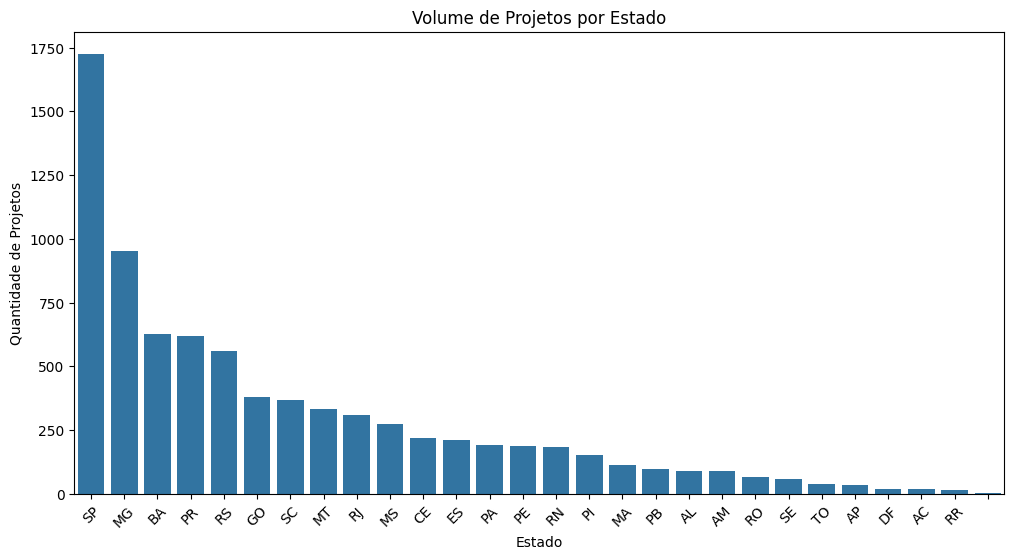

In [108]:
# Contar a quantidade de ocorrências de cada estado
contagem_estado = df_velha['Estado'].value_counts().reset_index()
contagem_estado.columns = ['Estado', 'Quantidade']

# Ordenar por ordem decrescente de quantidade de projetos
contagem_estado = contagem_estado.sort_values(by='Quantidade', ascending=False)

# Plotar o gráfico de barras
plt.figure(figsize=(12, 6))
sns.barplot(data=contagem_estado, x='Estado', y='Quantidade')
plt.title('Volume de Projetos por Estado')
plt.xlabel('Estado')
plt.ylabel('Quantidade de Projetos')
plt.xticks(rotation=45)
plt.show()

## Desafio 6 - Separe as oportunidades por regional

In [109]:
# Agrupar por região
grupos_regional = df_velha.groupby('Regional')

# Lista das regiões desejadas
regioes = ['Centro Oeste', 'Norte/Nordeste', 'BH/RIO', 'Curitiba', 'Joinville', 'Porto Alegre', 'Campinas', 'Sao Paulo']

# Iterar sobre as regiões desejadas
for regiao in regioes:
    # Verificar se a região está presente no grupo
    if regiao in grupos_regional.groups:
        # Obter a DataFrame correspondente à região
        df_regiao = grupos_regional.get_group(regiao)

        # Especificar o caminho e o nome do arquivo Excel para a região
        caminho_arquivo = f'{regiao.replace("/", "_")}.xlsx'

        # Salvar a DataFrame da região em um arquivo Excel
        df_regiao.to_excel(caminho_arquivo, index=False)
    else:
        print(f'A região "{regiao}" não foi encontrada na DataFrame.')

print('Separação concluída!')

Separação concluída!
